# Reference Information

A list of the most common ocean sounds and how loud they are.
https://sciencenotes.ucsc.edu/9601/OceanNoise/Noises.html
 
For long term use, may need to consider that the ambient levels are increasing in loudness due to increases in shipping.
 
Sound can be broken down into frequency, wavelength, and aplitutude.

The decibal system is logarithmic.
 
Whales are the loudest animals on Earth. Blue whales whistle at 188 db and can be heard at 160 km away. Sperm whales can click at 230 db. Normal human conversation is about 60 db.
 
North Atlantic right whales typically makes sounds under 500 hz and can make a whoop that goes from 50 hz to 440 hz.

# Imports

In [42]:
import numpy as np
import pandas as pd
import sklearn as sk

import librosa as lr
import librosa.display
from glob import glob

import pyaudio
import scipy.signal
import noisereduce as nr

import matplotlib.pylab as plt

# Load Data

In [3]:
#Location of Files
data_dir = 'data/train'

# List all the wav files in the folder
audio_files = glob(data_dir + '/*.aiff')

#Load csv with labels.
labels = pd.read_csv('data/train.csv')

labels.head(10)

#Label of 1 means the audio contains sounds made by the right whale.

,clip_name,label
0,train1.aiff,0
1,train2.aiff,0
2,train3.aiff,0
3,train4.aiff,0
4,train5.aiff,0
5,train6.aiff,1
6,train7.aiff,1
7,train8.aiff,0
8,train9.aiff,1
9,train10.aiff,0


# About the Files

In [4]:
print("Number of audio files =", labels.shape[0])


Number of audio files = 30000


In [5]:
import aifc, struct

obj = aifc.open('data/train/train1.aiff', 'r')

obj.getparams()

#If these were not the same for all files, could use this to create
#a table for further preprocessing.

_aifc_params(nchannels=1, sampwidth=2, framerate=2000, nframes=4000, comptype=b'NONE', compname=b'not compressed')

In [6]:
#framerate
fr = obj.getframerate()
print(fr)

2000


# Distribution of Categories

In [7]:
labels.groupby('label').count()

,clip_name
label,
0,22973
1,7027


# Connect Labels

In [8]:
audio_files[0:5]

['data/train\\train1.aiff',
 'data/train\\train10.aiff',
 'data/train\\train100.aiff',
 'data/train\\train1000.aiff',
 'data/train\\train10000.aiff']

In [9]:
labels['file_location'] = 'data/train\\'+labels['clip_name']

labels.head(10)

,clip_name,label,file_location
0,train1.aiff,0,data/train\train1.aiff
1,train2.aiff,0,data/train\train2.aiff
2,train3.aiff,0,data/train\train3.aiff
3,train4.aiff,0,data/train\train4.aiff
4,train5.aiff,0,data/train\train5.aiff
5,train6.aiff,1,data/train\train6.aiff
6,train7.aiff,1,data/train\train7.aiff
7,train8.aiff,0,data/train\train8.aiff
8,train9.aiff,1,data/train\train9.aiff
9,train10.aiff,0,data/train\train10.aiff


# View Files

In [10]:
#Set Sample Rate
sr=44000

#### Read the first audio file (non-whale label)

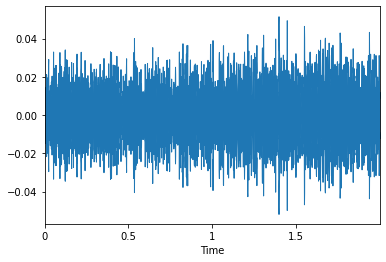

In [11]:
audio, sfreq = lr.load(labels['file_location'][0], sr=sr)
librosa.display.waveplot(audio, sr=sr);

#### Read an audio file with whale label

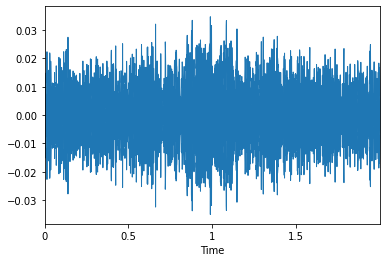

In [12]:
audio, sfreq = lr.load(labels['file_location'][5], sr=sr)
librosa.display.waveplot(audio, sr=sr);

# Preprocessing

Preprocessing of audio data involves resolving issues of noisness and varying time durations. In this case, the data is already consistently 2 second clips, so the main concern is noisiness.

### Split Data by Category

In [13]:
whale = labels[labels['label']==1].reset_index()
noise = labels[labels['label']==0].reset_index()

In [14]:
whale = whale['file_location']
noise = noise['file_location']

In [24]:
print(whale.head())
print(noise.head())

0     data/train\train6.aiff
1     data/train\train7.aiff
2     data/train\train9.aiff
3    data/train\train12.aiff
4    data/train\train28.aiff
Name: file_location, dtype: object
0    data/train\train1.aiff
1    data/train\train2.aiff
2    data/train\train3.aiff
3    data/train\train4.aiff
4    data/train\train5.aiff
Name: file_location, dtype: object


In [27]:
audio, sfreq = lr.load(whale[0], sr=sr)
whale_audio = audio

audio, sfreq = lr.load(noise[0], sr=sr)
noise_audio = audio

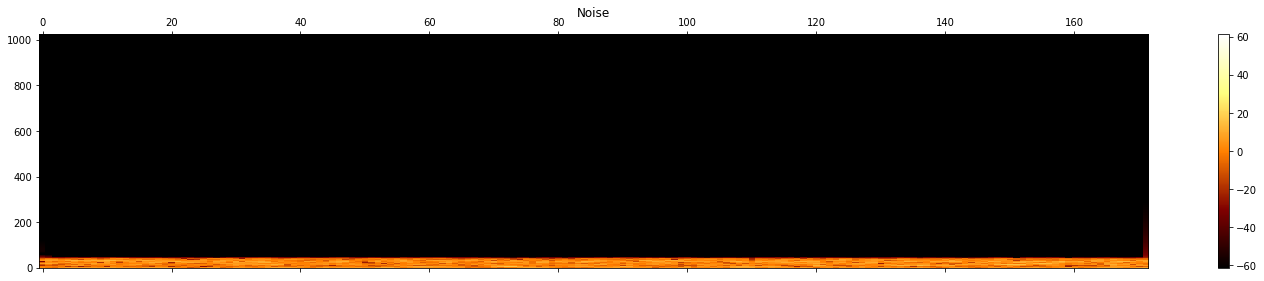

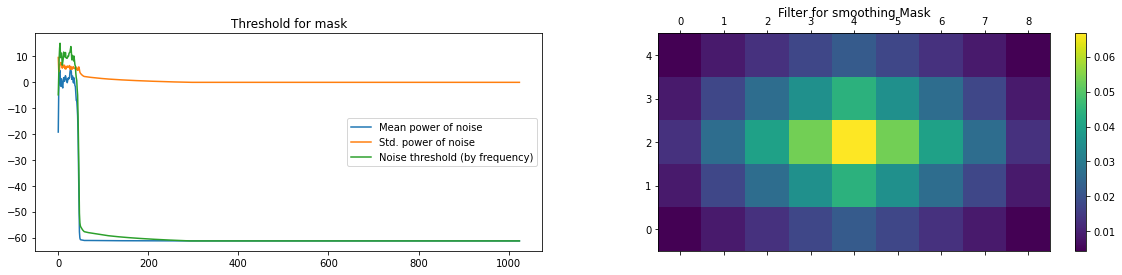

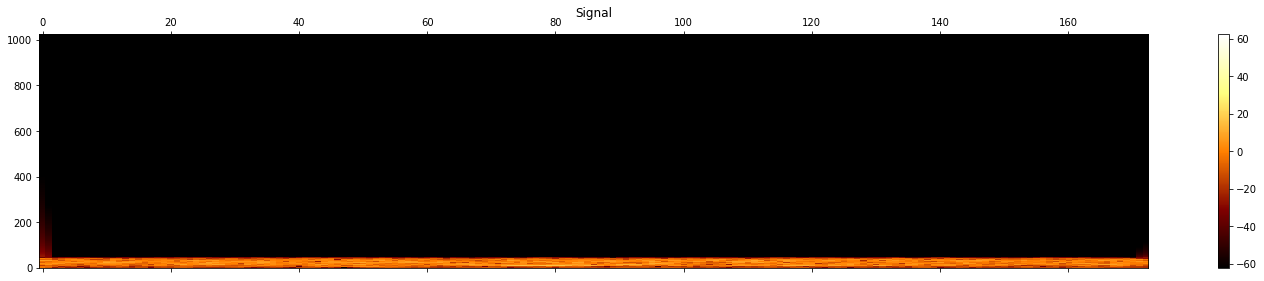

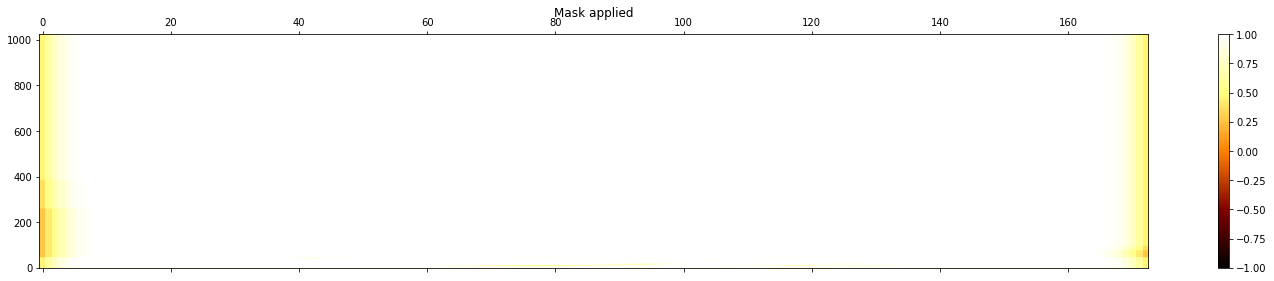

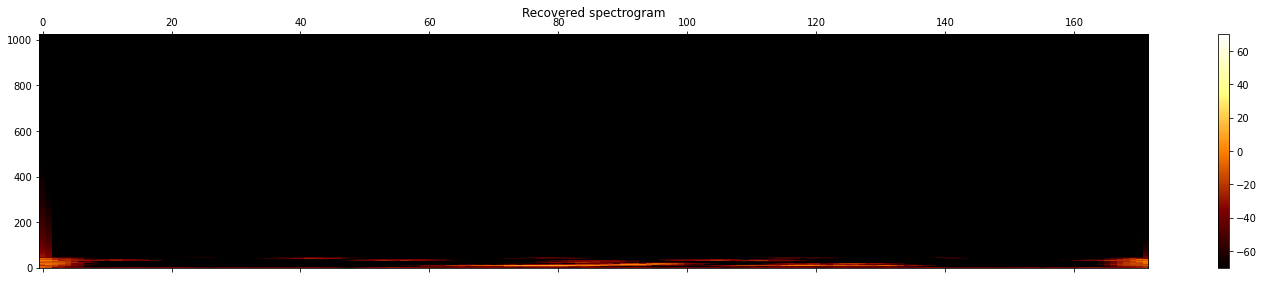

In [28]:
reduced_noise = nr.reduce_noise(audio_clip = whale_audio,
                               noise_clip = noise_audio, verbose = True)

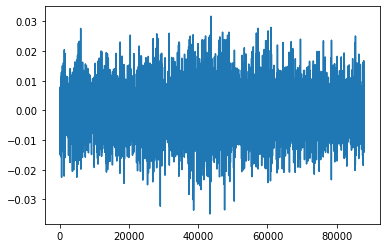

In [33]:
#Plot of the first whale audio without noise reduction.
plt.plot(whale_audio);

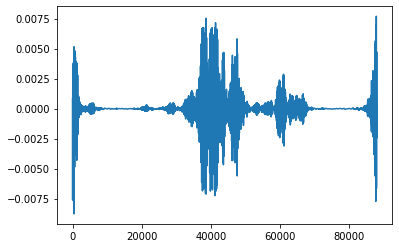

In [32]:
#Plot of the first whale audio with noise reduction.
plt.plot(reduced_noise);

Next steps:
Address issue of various other noises.
Reduce noise in all whale files.

Possible option: Combine files together by type and then noise reduce as one file.

# Spectrograms

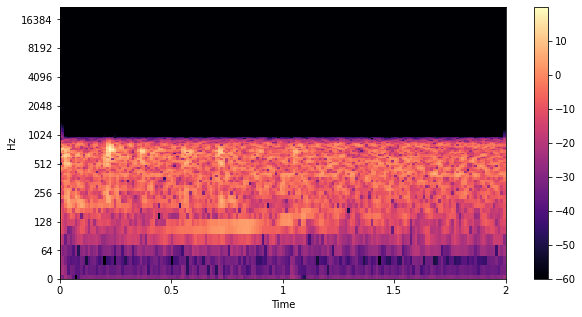

In [18]:
X = librosa.stft(whale_audio)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log');
plt.colorbar();

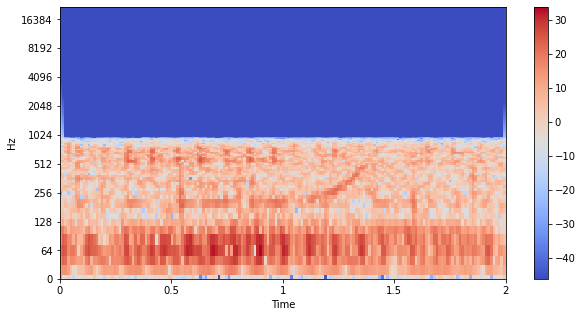

In [19]:
X = librosa.stft(noise_audio)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log');
plt.colorbar();

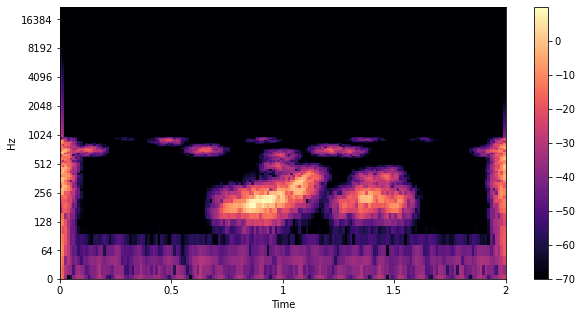

In [35]:
X = librosa.stft(reduced_noise)
#converting into energy levels(dB)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log');
plt.colorbar();

# Pitch Plots

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


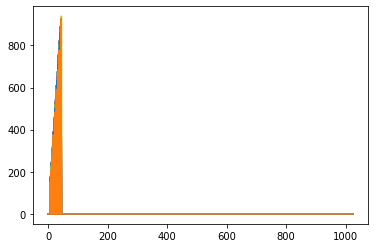

In [37]:
pitches, magnitudes = lr.piptrack(y=whale_audio, sr=sr)
print(pitches)
plt.plot(pitches)
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


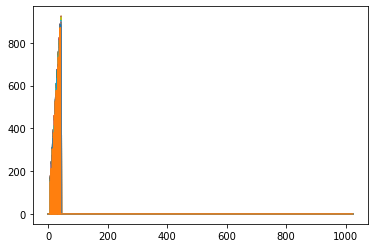

In [38]:
pitches, magnitudes = lr.piptrack(y=noise_audio, sr=sr)
print(pitches)
plt.plot(pitches)
plt.show()

# Feature Extraction

### Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean. 

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

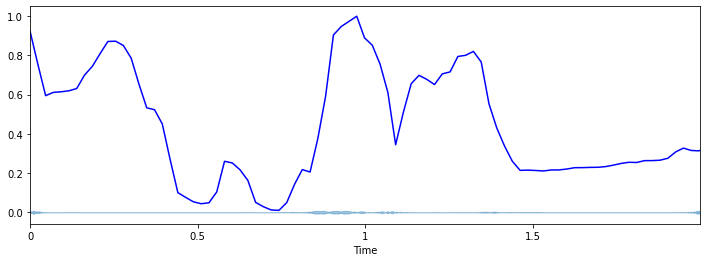

In [45]:
x = reduced_noise
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sk.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

### Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

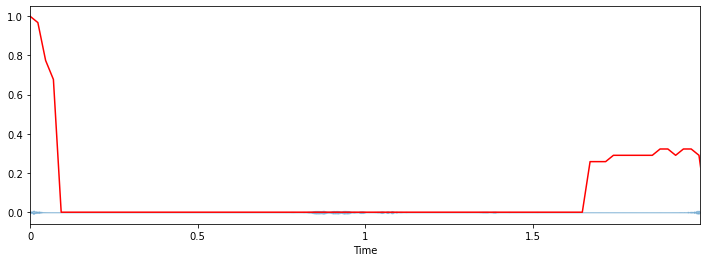

In [47]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.

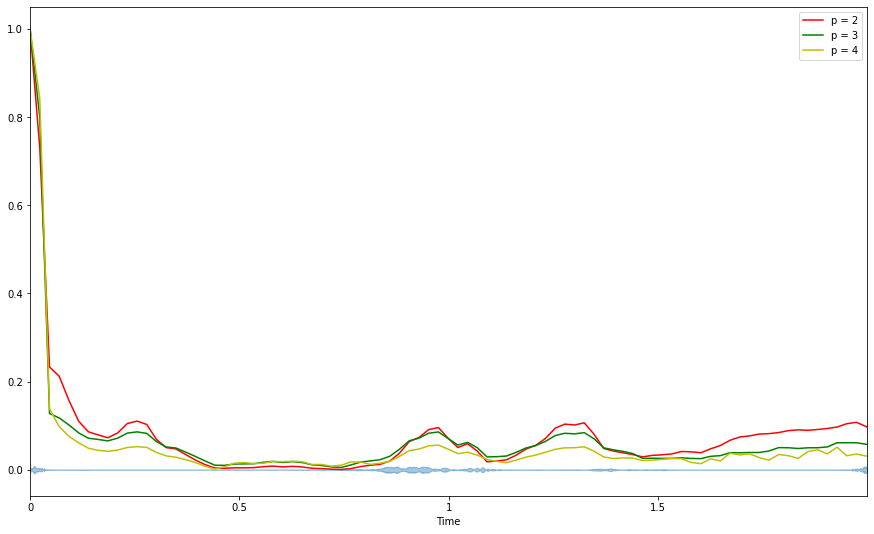

In [48]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### Zero-Crossing Rate

A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second — whereas an unvoiced fricative can have 3000 zero crossings per second.



It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

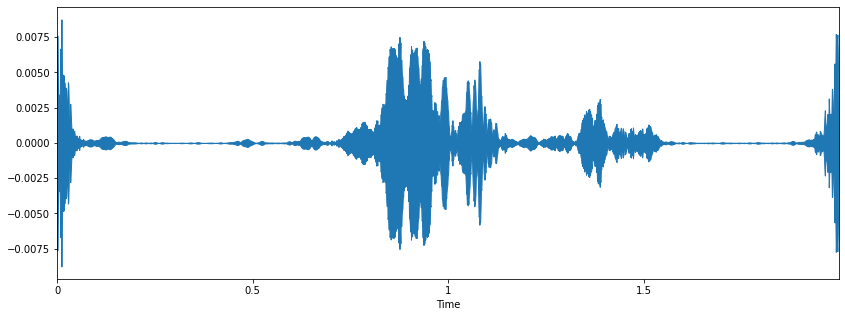

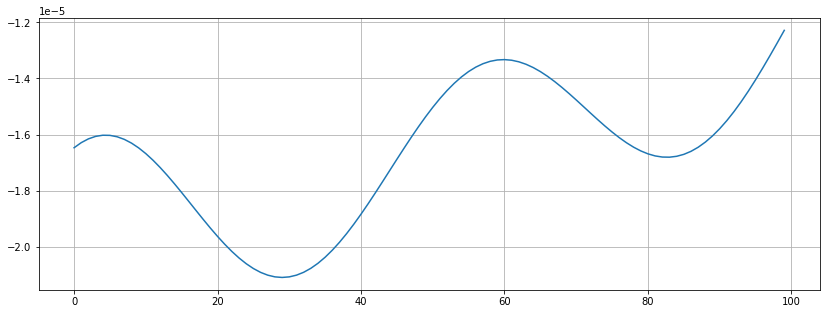

In [49]:
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [52]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

0
